In [2]:
from matplotlib import pyplot as plt
%matplotlib inline 
import healpy as hp
import numpy as np

In [7]:
#loading all the Dl's and converting them to Cl's and appending the first two rows
l,DlT,DlE,DlB,DlTE = np.loadtxt('PlanckPR2_TT_lowp_lensing_lensedCls2.dat', unpack = True)

DlP = DlE**2 + DlTE**2
DlTQ = DlT*DlE

ClT = np.pi*2*(DlT)/(l*(l+1))
ClE = np.pi*2*(DlE)/(l*(l+1))
ClB = np.pi*2*(DlB)*0/(l*(l+1))
ClTE = np.pi*2*(DlTE)/(l*(l+1))

ClT= np.append([0,0], ClT)
ClE=  np.append([0,0], ClE)
ClTE = np.append([0,0], ClTE)
ClB = np.append([0,0], ClB)

l = np.append([0,1],l)

mapT, mapQ, mapU = hp.synfast([ClT,ClE,ClB,ClTE],nside =128, lmax =306,verbose = False, pixwin = True, pol= True, new = True)


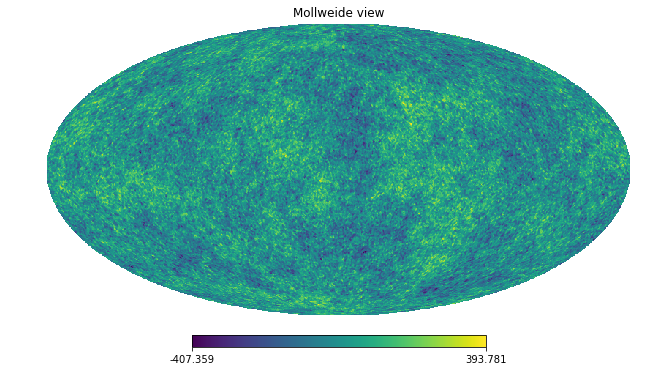

In [8]:
#generating and visualiaing the temperature map genereated using the Cl's
hp.mollview(mapT)

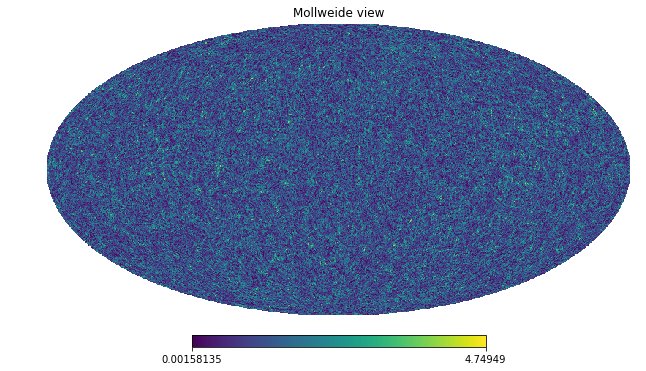

In [9]:
#generating and visualiaing the polarization map genereated using the Cl's
#p^2 = q^2 + u^2
mapP = np.sqrt(mapQ**2+mapU**2)
hp.mollview(mapP)

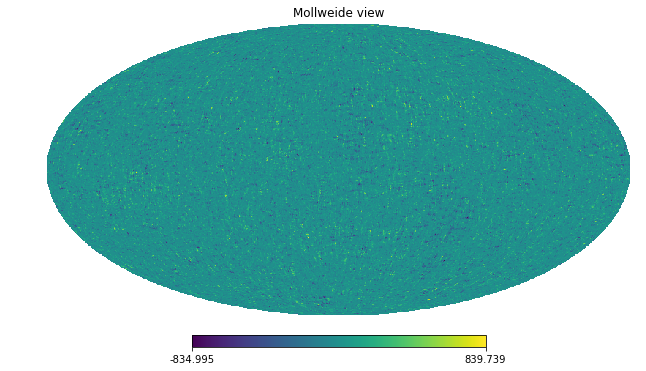

In [10]:
#generating and visualiaing the TE map genereated using the Cl's
mapTQ =  mapT*mapQ
hp.mollview(mapTQ)

In [11]:
#reading the mask for the map
mask_256 = hp.read_map('mask_common_256_ecliptic.fits', nest = None, verbose = False)
#degrading the mask
mask_128 = hp.ud_grade(mask_256,128)
#modifying the degraded map
mask_128[mask_128>=0.9]=1
mask_128[mask_128<0.9]=0

#selecting the trusted pixels
goodpix = mask_128==1

#NSIDE to NPIX
NSIDE = 128
NPIX = hp.nside2npix(NSIDE)#useful for generating the north and south sides

#generating a mask for the north
mask_north = np.copy(mask_128) #making a copy of the 128 mask
mask_north[NPIX//2:]=0 #setting the southern hemisphere to zero, this gives the map of just the north 
mask_gn = mask_north==1 #we only want pixels we can trust, this mask only has good pixels from the north

#generating a mask of the south
mask_south = np.copy(mask_128)
mask_south[:NPIX//2]=0
mask_gs = mask_south==1

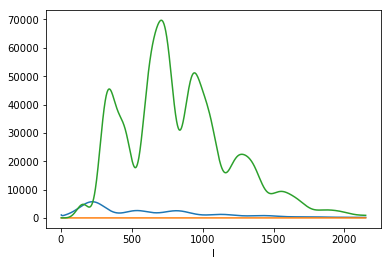

In [12]:
#plot of l vs Dl
plt.plot(l[2:], DlT)
plt.plot(l[2:],DlE)
plt.plot(l[2:],DlTQ)
plt.xlabel('l')

In [13]:
#declaring variables 
val = 1000
#making a list for the variance
var_list=[None]*val

#these are values from the temperature map
truvar = 7846.7388139787972
truvarN = 7411.2446794166744
truvarS = 8257.8906490368499

In [19]:
for i in range(0,1):
    for x in range(0,val):
        T,Q,U = hp.synfast([ClT,ClE,ClB,ClTE],nside =128, lmax =306,verbose = False, pixwin = True, pol= True, new = True)
        gT = np.var(T[goodpix])
        nT = np.var(T[mask_gn])
        sT = np.var(T[mask_gs])
        gQ = np.var(Q[goodpix])
        nQ = np.var(Q[mask_gn])
        sQ = np.var(Q[mask_gs])
        gU = np.var(U[goodpix])
        nU = np.var(U[mask_gn])
        sU = np.var(U[mask_gs])
        gP = gQ + gU
        nP = nQ + nU
        sP = sQ + sU
        TQ = T*Q
        gTQ = np.var(TQ[goodpix])
        nTQ = np.var(TQ[mask_gn])
        sTQ = np.var(TQ[mask_gs])
        var_list[x] = nT,sT,gT, nP,sP,gP, nTQ, sTQ, gTQ
        var_polg= np.array(var_list)
    filepnew = open('var_polg.dat','ab')
    np.savetxt(filepnew,var_polg)
    filepnew.close()

In [20]:
var_pol = np.loadtxt('var_polg.dat')

In [21]:
num = len(var_pol)
var_pol.shape

(10000, 9)

In [24]:
pN = truvarN - var_pol[:,[0]]
pS = truvarS - var_pol[:,[1]]
p = truvar - var_pol[:,[2]]

In [25]:
lowN = pN>=0
vlowS = pS>(0.01*truvarS)
lowS = pS>(0.1*truvarS)
HighS = pS>(0.5*truvarS)
lowNvlowS = lowN[vlowS] 
lowNlowS = lowN[lowS] 
lowNHighS = lowN[HighS] 
a = lowNvlowS == True
b = lowNlowS == True
c = lowNHighS == True

A = len(pN[a])
B = len(pN[b])
C = len(pN[c])
A

/home/pratyusha/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 3222
/home/pratyusha/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 8


5

In [26]:
var_d = np.delete(var_pol,[2,5,8],1)
var_d.shape

(10000, 6)

In [27]:
plotlabels = [r'$\langle T\rangle^2 $- N $\quad$($\mu K^2$)',\
              r'$\langle T\rangle^2 $- S$\quad$($\mu K^2$)',\
              r'$\langle P\rangle^2 $- N$\quad$($\mu K^2$)',\
              r'$\langle P\rangle^2 $- S$\quad$($\mu K^2$)',\
              r'$\langle TQ\rangle^2 $- N$\quad$($\mu K^2$)',\
              r'$\langle TQ\rangle^2 $- S$\quad$($\mu K^2$)']
filename = ["T-N", "T-S", "Pol-N","Pol-S" ,"TQ-N", "TQ-S"]

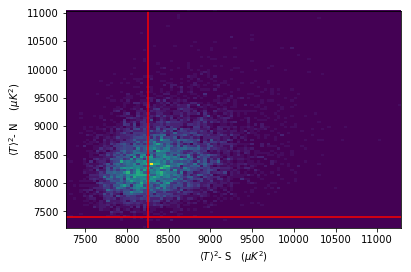

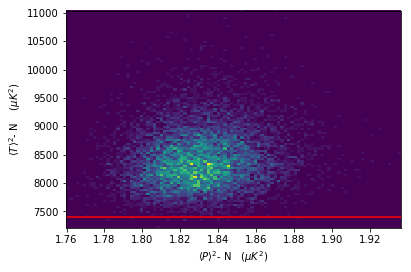

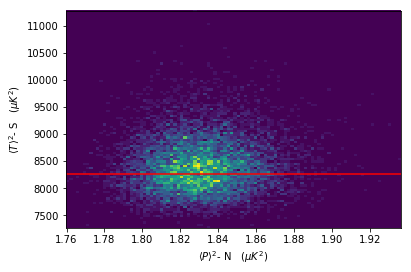

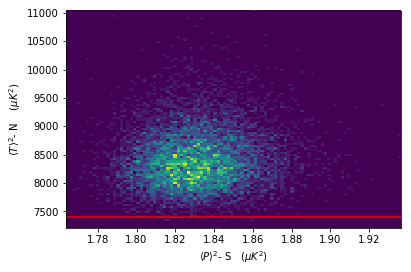

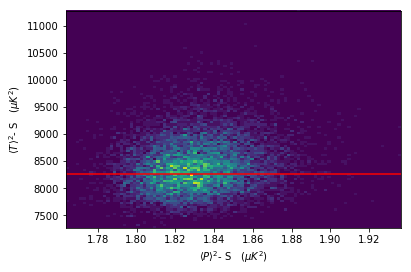

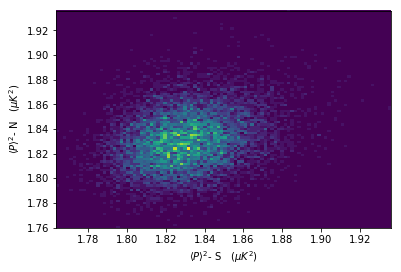

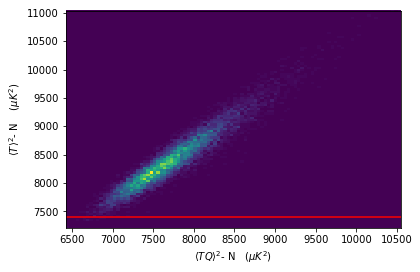

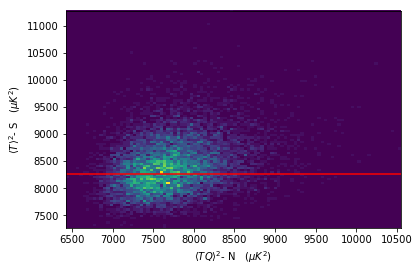

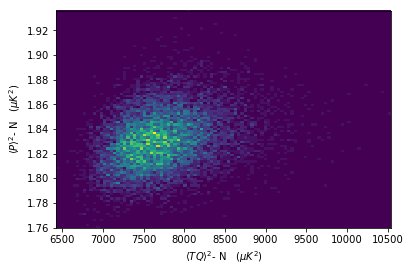

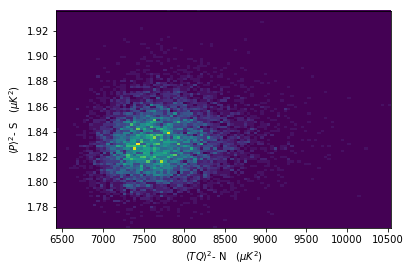

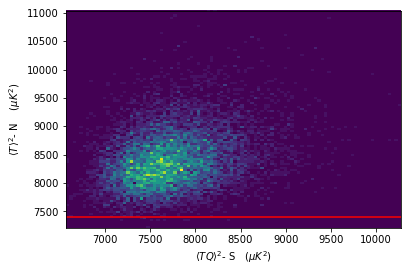

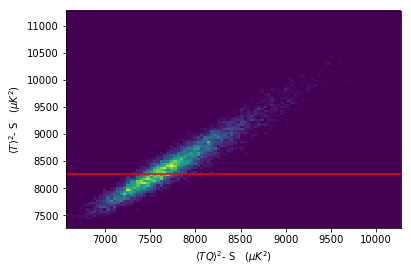

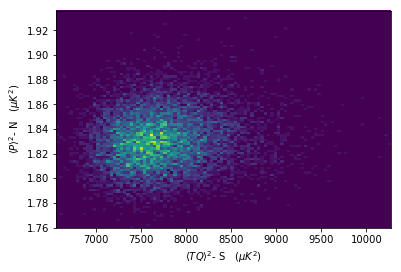

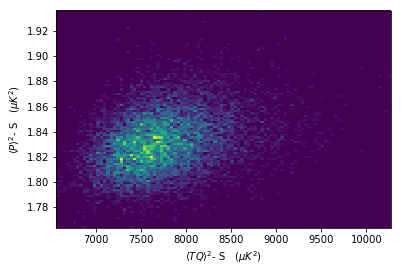

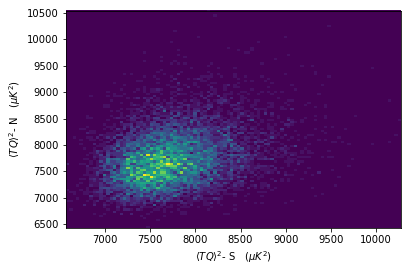

In [28]:
for i in range(0,6):
    for j in range(i):
            plt.hist2d(var_d[:,i],var_d[:,j],bins =100)
            if(j==0):
                plt.axhline(y = truvarN, color = 'r')
            if(j==1):
                plt.axhline(y = truvarS, color = 'r')
            if(i==0):
                plt.axvline(x = truvarN, color = 'r')
            if(i==1):
                plt.axvline(x = truvarS, color = 'r')
            plt.xlabel(plotlabels[i])
            plt.ylabel(plotlabels[j])
            plt.savefig('{} vs {}'.format(filename[j],filename[i]),bbox_inches='tight')
            plt.show()

In [29]:
#calculating p value
pval = len(p[p>=0])/(len(var_pol))
pval

0.0329

In [30]:
#calculating p value only for the north 
pvalN = len(pN[pN>=0])/(len(var_pol))
pvalN

0.0013

In [31]:
#calculating p value only for the south
pvalS = len(pS[pS>=0])/(len(var_pol))
pvalS

0.3974

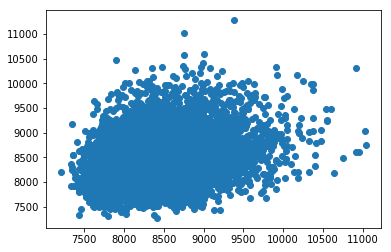

In [33]:
plt.scatter(var_pol[:,[0]],var_pol[:,[1]])

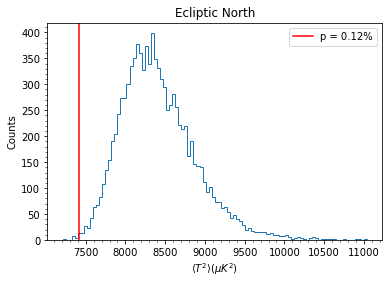

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.minorticks_on()
plt.hist(var_pol[:,0], 100,histtype = 'step')
plt.axvline(truvarN, color = 'r', label = 'p = 0.12%')
plt.title('Ecliptic North')
plt.xlabel(r'$\langle T^2 \rangle{(\mu K^2)}$')
plt.ylabel('Counts')
plt.legend()
plt.savefig('EclT-N hist',bbox_inches='tight')

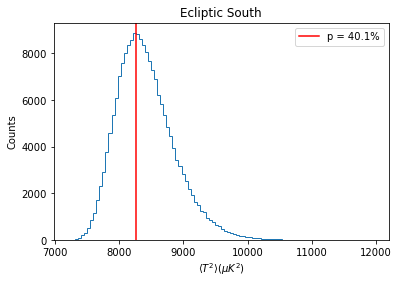

In [62]:
plt.hist(var_pol[:,1],100,histtype='step')
plt.title('Temperature-South')
plt.axvline(truvarS, color = 'r', label = 'p = 40.1%')
plt.title('Ecliptic South')
plt.xlabel(r'$\langle T^2 \rangle{(\mu K^2)}$')
plt.ylabel('Counts')
plt.legend()
plt.savefig('EclT-S hist',bbox_inches='tight')

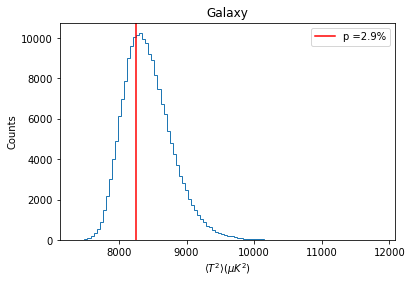

In [63]:
plt.hist(var_pol[:,2],100,histtype='step')
plt.title('Temperature-Galaxy')
plt.axvline(truvarS, color = 'r', label = 'p =2.9%')
plt.title('Galaxy')
plt.xlabel(r'$\langle T^2 \rangle{(\mu K^2)}$')
plt.ylabel('Counts')
plt.legend()
plt.savefig('EclT-G hist',bbox_inches='tight')
